In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from tqdm import tqdm

In [5]:
names = ['year', '0-4',	'5-9',	'10-14',	'15-19',	'20-24',	'25-29',	'30-34',	'35-39',	'40-44',	'45-49',	'50-54',	'55-59',	'60-64',	'65-69',	'70-74',	'75-79',	'80-84',	'85-89',	'90-94',	'95-99',	'100+']

In [6]:
data_age = pd.read_excel('BY_AGE_BOTH_SEXES.xlsx')
data_age_ru = data_age[(data_age['Unnamed: 2'] == "Russian Federation")].iloc[:, 7:]
data_age_ru.set_axis(names, axis=1, inplace=True)
data_age_ru_fem = pd.read_excel('BY_AGE_FEMALE.xlsx')
data_age_ru_fem = data_age_ru_fem[data_age_ru_fem['Unnamed: 2'] == "Russian Federation"].iloc[:, 7:]
data_age_ru_fem.set_axis(names, axis=1, inplace=True)
data_age_ru_man = pd.read_excel('BY_AGE_MALE.xlsx')
data_age_ru_man = data_age_ru_man[data_age_ru_man['Unnamed: 2'] == "Russian Federation"].iloc[:, 7:]
data_age_ru_man.set_axis(names, axis=1, inplace=True)


def appends(data, newborn, shift, year):
    new_arr = np.array([year, newborn])
    # print(data)
    for x in shift:
        new_arr = np.append(new_arr, np.round(x,2))
    data.loc[len(data)] = new_arr

def model(men, women, year, fertility_rate, boys_girls_ratio, death_rate_men, death_rate_women):
    shift_women = women[(women['year'] == year - 1)].iloc[0, 1:-1] * death_rate_women
    newborn = fertility_rate * np.sum([shift_women['15-19'],shift_women['20-24'], shift_women['25-29'], shift_women['30-34'], shift_women['35-39'], shift_women['40-44'], shift_women['45-49']])
    newborn_women = newborn / (1 + boys_girls_ratio )
    newborn_men = newborn - newborn_women
    shift_men = men[(men['year'] == year - 1)].iloc[0, 1:-1] * death_rate_men
    appends(women, newborn_women, shift_women, year)
    appends(men, newborn_men, shift_men, year)
    return np.sum([np.sum(shift_women.values), np.sum(shift_men.values),newborn])

In [7]:
def survival_rate(data, year, step=1):
    return data[data['year'] == year].iloc[:, 2:].values / data[data['year'] == year - step].iloc[:, 1:-1].values

def fertility(men, women, year):
    return (men[men['year'] == year]['0-4'].values + women[women['year'] == year]['0-4'].values)/ np.sum([ women[women['year'] == year]['15-19'].values,women[women['year'] == year]['20-24'].values, women[women['year'] == year]['25-29'].values, women[women['year'] == year]['30-34'].values, women[women['year'] == year]['35-39'].values, women[women['year'] == year]['40-44'].values, women[women['year'] == year]['45-49'].values]) * 0.97#add +1
def newborn_men_over_women(men, women, year):
    return men[men['year'] == year]['0-4'].values / women[women['year'] == year]['0-4'].values

f_s = []
m_s = []
f_f = []
m_w = []

for year in range(2005, 2020):
    f_s.append(survival_rate(data_age_ru_fem, year, step=1)[0])
    m_s.append(survival_rate(data_age_ru_man, year, step=1)[0])
    f_f.append(fertility(data_age_ru_man, data_age_ru_fem, year)[0])
    m_w.append(newborn_men_over_women(data_age_ru_man, data_age_ru_fem, year)[0])

In [8]:
minmax_fem_vals = [[i,j] for i, j in zip(np.min(f_s, axis=0), np.max(f_s, axis=0))]
minmax_fem_vals

[[0.8769410012085682, 0.9659952391298557],
 [0.8846619320709765, 1.2585974295806186],
 [0.8941593129055081, 1.4213221144805832],
 [0.9851119199236449, 1.4034823361342472],
 [0.9205392525642112, 1.3949983866162088],
 [0.9293540258478263, 1.2190809653669104],
 [0.9145009981226929, 0.9589232270695796],
 [0.8923286212427193, 1.1866984496328756],
 [0.8871691373091382, 1.240618447736124],
 [0.9024428247240706, 1.2362885949321296],
 [0.8275369455717423, 1.1907346194586608],
 [0.6384247770941975, 0.9681305411179089],
 [0.6858486041941699, 1.5498963430727435],
 [0.659979341606536, 1.3808830609348153],
 [0.5966547483127596, 1.2537705721452763],
 [0.49729964422249384, 0.9965336713664774],
 [0.35321880135370987, 0.704427858126022],
 [0.2410446181334733, 0.5321889565980591],
 [0.14982355404031342, 0.3308296318477484],
 [0.06684136841727394, 0.15985082578582846]]

In [9]:
minmax_men_vals = [[i,j] for i, j in zip(np.min(m_s, axis=0), np.max(m_s, axis=0))]
minmax_men_vals

[[0.8763992042755157, 0.963445503748609],
 [0.8841038081565352, 1.2573807701358188],
 [0.8922040607372728, 1.406510193241615],
 [0.976942704730729, 1.3803743955743766],
 [0.8981608536145512, 1.3671129886817361],
 [0.899153621318469, 1.1930488439189066],
 [0.8893705700860671, 0.9435993934203674],
 [0.8595061785602399, 1.1498543181002696],
 [0.8483846399235209, 1.2024478998818349],
 [0.8485525561542601, 1.1835028295720924],
 [0.7684091069474569, 1.119026997031367],
 [0.5594076920587351, 0.8669770062787856],
 [0.585448591631479, 1.3768139067213978],
 [0.5540937112082409, 1.245761509561085],
 [0.4908371424677133, 1.10711673027411],
 [0.3013468129406066, 0.8941249447484055],
 [0.1890204612254126, 0.5599606345805279],
 [0.12338512288033622, 0.42277286984735446],
 [0.09131739184463261, 0.24973142208170904],
 [0.037830188679245286, 0.11529454152404972]]

In [10]:
minmax_fert_vals = [np.min(f_f), np.max(f_f)]
minmax_fert_vals

[0.1699128558505247, 0.26842950388715886]

In [11]:
minmax_m_w_vals = [np.min(m_w), np.max(m_w)]
minmax_m_w_vals

[1.0497972845546397, 1.0577244169701865]

In [12]:
#define the model inputs
problem = {
    'num_vars': 2 + len(minmax_men_vals) + len(minmax_fem_vals),
    'names': ['fertility_rate', 'boys_girls_ratio', 'death_rate_men', 'death_rate_women'],
    'bounds':[minmax_fert_vals,
              minmax_m_w_vals,
              *minmax_men_vals,
              *minmax_fem_vals]
}

In [13]:
len(minmax_men_vals)

20

In [14]:
# flat_vector = lambda min, max, size: [[min, max] for _ in range(0, size)]
# aa = flat_vector(0, 1, len(names) - 2)
# aa

In [15]:
# len(aa)

In [16]:
param_values = saltelli.sample(problem, 1024)

In [17]:
np.shape(param_values)

(88064, 42)

In [18]:
param_values

array([[0.17005717, 1.05278157, 0.91537452, ..., 0.2772955 , 0.22574358,
        0.07451647],
       [0.24865883, 1.05278157, 0.91537452, ..., 0.2772955 , 0.22574358,
        0.07451647],
       [0.17005717, 1.056869  , 0.91537452, ..., 0.2772955 , 0.22574358,
        0.07451647],
       ...,
       [0.18275658, 1.0577128 , 0.88426227, ..., 0.44447604, 0.29309057,
        0.07288153],
       [0.18275658, 1.0577128 , 0.88426227, ..., 0.44447604, 0.20117342,
        0.15272071],
       [0.18275658, 1.0577128 , 0.88426227, ..., 0.44447604, 0.20117342,
        0.07288153]])

In [19]:
years = range(2021, 2030)

In [20]:
men = data_age_ru_man.iloc[-2:, :].reset_index(drop=True)
women = data_age_ru_fem.iloc[-2:, :].reset_index(drop=True)
total = data_age_ru.iloc[-2:, :].reset_index(drop=True)
result = []
# for year in tqdm(range(2021, 2051)):
#     y = np.array([model(men, women, year, param[0], param[1], param[2:2 + len(names) - 2],param[2 + len(names) - 2:]) for param in param_values])
#     result.append(y)
# result = np.array(result)

for param in tqdm(param_values):
    men = data_age_ru_man.iloc[-2:, :].reset_index(drop=True)
    women = data_age_ru_fem.iloc[-2:, :].reset_index(drop=True)
    total = data_age_ru.iloc[-2:, :].reset_index(drop=True)
    y = np.array([model(men, women, year, param[0], param[1], param[2:2 + len(names) - 2],param[2 + len(names) - 2:]) for year in range(2021, 2030)])
    result.append(y)
result = np.array(result)

 41%|████      | 35720/88064 [19:23<28:24, 30.70it/s]


KeyboardInterrupt: 

In [ ]:
men

In [ ]:
np.shape(result)

In [ ]:
sobol_indices = [sobol.analyze(problem, Y) for Y in result.T]

In [ ]:
sobol_indices

In [ ]:
S1s = np.array([s['S1'] for s in sobol_indices])
S1s

In [ ]:
np.shape(S1s)

In [ ]:
fig = plt.figure(figsize=(15, 10))
# gs = fig.add_gridspec(2, 2)
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[:, 0])
ax0.plot(years, np.mean(result, axis=0), label="Mean", color='green')

# in percent
prediction_interval = 95

ax0.fill_between(years,
                 np.percentile(result, 50 - prediction_interval/2., axis=0),
                 np.percentile(result, 50 + prediction_interval/2., axis=0),
                 alpha=0.5, color='red',
                 label=f"{prediction_interval} % prediction interval")

ax0.set_xlabel("years")
ax0.set_ylabel("population")
ax0.legend(title=r"population modeling",
           loc='upper center')._legend_box.align = "left"
# plt.savefig('sensitivity.png', bbox_inches='tight')
plt.show()

In [61]:
np.min(result, axis=0)

array([144824.38558637, 146501.75894628, 147983.70009442, 147847.26326769,
       147191.82846709, 145760.99419675, 144835.25301963, 143820.03827971,
       142180.05498637, 139054.34405035, 135807.9599211 , 133664.7250553 ,
       132434.72121319, 130043.06146835, 126386.97317957, 121835.14938071,
       118208.88681944, 115422.66003325, 112828.75759195, 110139.59928339,
       107539.28567216, 104984.8823192 , 102432.56619335,  99784.92196098,
        97100.30819815,  94531.82034783,  92211.68524103,  90013.40909527,
        87829.05123297])

In [62]:
np.max(result, axis=0)

array([157304.17208003, 161631.44110787, 163169.06145817, 162898.78747594,
       159630.7566386 , 158242.21844574, 159154.06622115, 158734.71690139,
       155526.55182953, 152875.29696405, 147987.29135829, 146566.11316563,
       146276.65931274, 143775.19676934, 138492.51082826, 133488.14593122,
       129133.73788572, 126155.46323494, 123306.58196648, 120406.62442132,
       117679.58200203, 115082.41157692, 112312.35599737, 109230.03261383,
       106103.90942569, 103308.22493237, 100861.76565587,  98490.75181923,
        96103.53650454])

In [81]:
men = data_age_ru_man.iloc[-7:, :].reset_index(drop=True)
women = data_age_ru_fem.iloc[-7:, :].reset_index(drop=True)
total = data_age_ru.iloc[-7:, :].reset_index(drop=True)
def shift(data, year):
    return data[(data['year'] == year - 1)].iloc[0, 1:-1] * survival_rate(data, year - 1)[0]

def appends(data, newborn, shift, year):
    new_arr = np.array([year, newborn[0]])
    # print(data)
    for x in shift:
        new_arr = np.append(new_arr, np.round(x,2))
    data.loc[len(data)] = new_arr

def population_modeling(men, women, year):
    shift_women = shift(women, year)
    newborn = fertility(men, women, year - 1) * np.sum([shift_women['15-19'],shift_women['20-24'], shift_women['25-29'], shift_women['30-34'], shift_women['35-39'], shift_women['40-44'], shift_women['45-49']]) #add + 1
    newborn_women = newborn / (1 + newborn_men_over_women(men, women, year - 1) )
    newborn_men = newborn - newborn_women
    shift_men = shift(men, year)
    appends(women, newborn_women, shift_women, year)
    appends(men, newborn_men, shift_men, year)

for year in range(2021, 2100):
    population_modeling(men, women, year)
total = women.iloc[:, 1:] + men.iloc[:, 1:]
total.insert(0, "year", women['year'])
total
ideal_df = pd.read_excel('BY_AGE_BOTH_SEXES.xlsx', sheet_name='MEDIUM VARIANT')
ideal_df = ideal_df[(ideal_df['Unnamed: 2'] == "Russian Federation")].iloc[:, 7:]
ideal_df.set_axis(names, axis=1, inplace=True)
ideal_sum = []
total_sum = []
for year in range(2021, 2051):
    ideal_sum.append(ideal_df[ideal_df['year'] == year].iloc[:, 1:].sum(axis=1))
    total_sum.append(total[total['year'] == year].iloc[:, 1:].sum(axis=1))

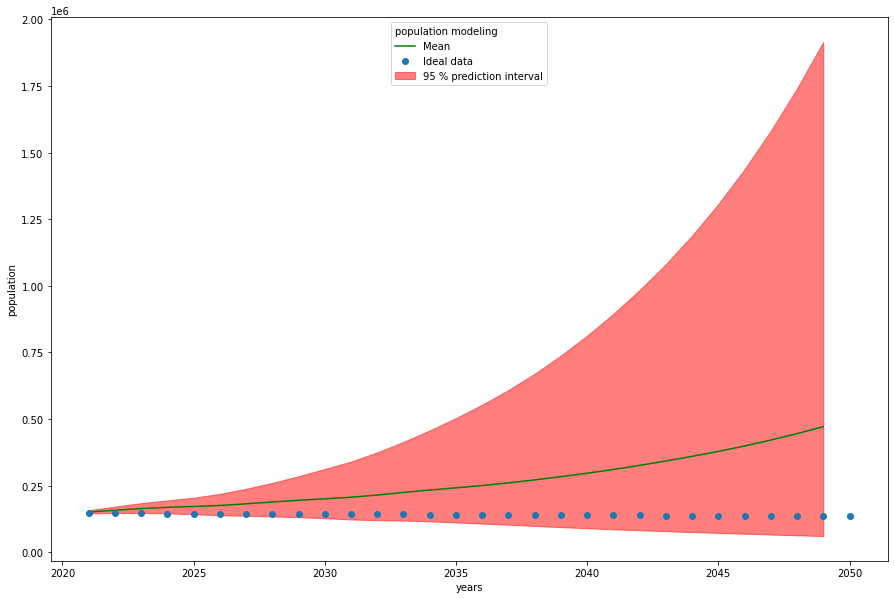

In [83]:
fig = plt.figure(figsize=(15, 10))
# gs = fig.add_gridspec(2, 2)
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[:, 0])
ax0.plot(years, np.mean(result, axis=0), label="Mean", color='green')
plt.plot(range(2021, 2051), ideal_sum, 'o', label="Ideal data")
# in percent
prediction_interval = 95

ax0.fill_between(years,
                 np.percentile(result, 50 - prediction_interval/2., axis=0),
                 np.percentile(result, 50 + prediction_interval/2., axis=0),
                 alpha=0.5, color='red',
                 label=f"{prediction_interval} % prediction interval")

ax0.set_xlabel("years")
ax0.set_ylabel("population")
ax0.legend(title=r"population modeling",
           loc='upper center')._legend_box.align = "left"
plt.savefig('sensitivity_with_ideal.png', bbox_inches='tight')
plt.show()

In [87]:
si = []
si_summed = []
for s in sobol_indices:
    si_summed.append(np.array([s['S1'][0], s['S1'][1], s['S1'][2:].sum()]))
    si.append(s['S1'])

In [91]:
si_summed_df = pd.DataFrame(si_summed)
si_summed_df = si_summed_df.rename(columns = {0:'FR', 1:'B/G', 2:'SR'})
# si_summed_df = si_summed_df.rename(index = [names])
si_summed_df

,FR,B/G,SR
0,0.112758,0.000000e+00,1.118326
1,0.114246,-2.720894e-06,1.137611
2,0.126616,-5.661414e-06,1.098023
3,0.146470,4.955477e-06,1.047017
4,0.177013,1.220972e-05,0.985537
5,0.212017,1.233274e-05,0.938283
6,0.240379,2.164553e-06,0.898355
7,0.253917,-8.661152e-07,0.859553
8,0.261999,7.147139e-06,0.815506
9,0.269840,8.507173e-06,0.780651


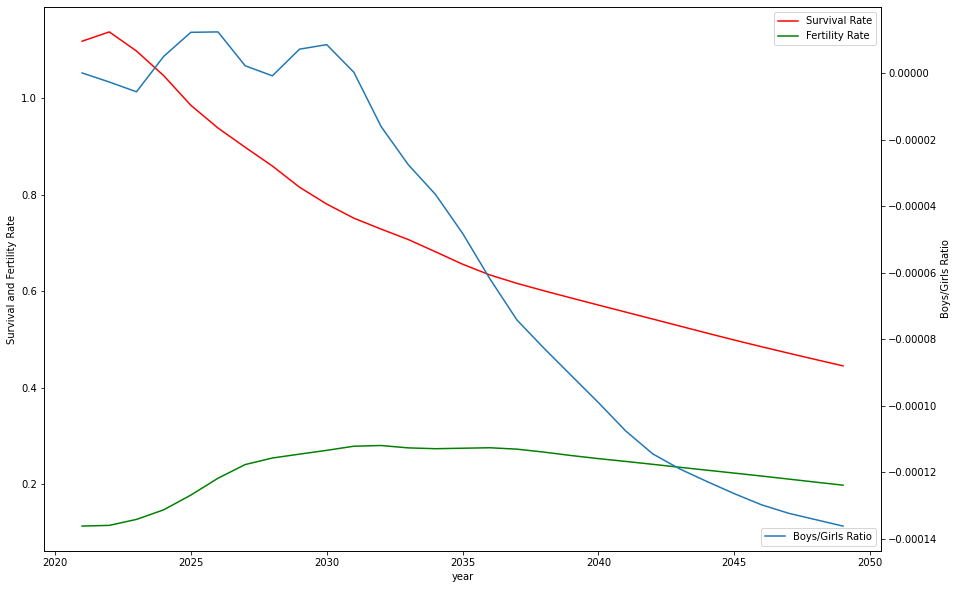

In [111]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot( 111 )
ax.plot(range(2021, 2050), si_summed_df['SR'], label='Survival Rate', color="red")
ax.plot(range(2021, 2050), si_summed_df['FR'], label='Fertility Rate', color="green")
ax.legend(loc = 0)
ax2 = ax.twinx()
ax2.plot(range(2021, 2050), si_summed_df['B/G'], label='Boys/Girls Ratio')
plt.xticks(fontsize=20)
plt.yticks()
ax2.legend(loc = 4)
ax.set_xlabel( "year" )
ax.set_ylabel(r"Survival and Fertility Rate" )
ax2.set_ylabel(r"Boys/Girls Ratio" )
plt.show()